<a href="https://colab.research.google.com/github/princdsn/ai-generate-quizz/blob/main/Salinan_dari_Salinan_dari_Heart_Attack_Predict_using_DecisionTree_btng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Prince Valerie Da'matha Jr
NIM : A11.2022.14266

DATA SET ▶ [Heart Disease Dataset](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset) by Kaggle

*Attribute Information*

---

1.    **age* : age of the patient [years] ----- *age

2.    **gender* : (0 for Female, 1 for Male) ----- *gender
3.  **impluse* ----- *Heart rate
4. **pressurehight* ----- *Systolic BP
5. **pressurelow* ----- *Diastolic BP
6. **glucose* ----- *blood sugar
7. **kcm* ----- *CK-MB
8. **troponin* ----- *Test-Troponin
9. **class* ----- *Output of heart attack


# *Library pada Bahasa Python*


1.  *Pandas library* (pd).
Pandas digunakan untuk bekerja dengan kumpulan data dan memiliki fungsi untuk menganalisis, membersihkan, mengeksplorasi, dan memanipulasi data.

2. *NumPy library* (np).
NumPy digunakan untuk bekerja dengan array dan memiliki fungsi untuk mengerjakan domain aljabar linier, transformasi fourier, dan matriks.

3. *Matplotlib libary* (matplotlib.pyplot). Ini digunakan untuk membuat grafik dan plot dengan menggunakan skrip Python. Ini memiliki modul bernama pyplot (plt) yang memudahkan pembuatan plot dengan menyediakan fitur untuk mengontrol gaya garis, properti font, sumbu pemformatan, dll.

4. *Seaborn library* (sns). Ini adalah perpustakaan visualisasi data Python berdasarkan matplotlib dan menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik dan informatif.

5. *Regular Expression module* (re). Ini adalah karakter urutan yang membentuk pola pencarian dan dapat digunakan untuk memeriksa apakah string berisi pola pencarian yang ditentukan.

6. *Scipy Library*. Salah satu library di Python yang digunakan untuk komputasi ilmiah dan teknis. Library ini menyediakan berbagai alat untuk menyelesaikan masalah matematika, statistika, optimasi, sains, dan teknik. Salah satu submodul yang dimilikinya adalah `stats`, yang berfokus pada statistika. Dengan menggunakan `scipy.stats`, kamu bisa melakukan berbagai analisis statistika seperti uji hipotesis, distribusi probabilitas, dan berbagai operasi statistika lainnya.

In [ ]:
import numpy as np #library untuk kalkulasi data
import pandas as pd #library untuk membaca data
import matplotlib.pyplot as plt #visual
import seaborn as sns
import re
sns.set()
from scipy import stats #outlier

#import dataset

In [ ]:
data = pd.read_csv("/content/Heart Attack.csv")
data

In [ ]:
data.sample(10)

In [ ]:
data.info()

mencari data null

In [ ]:
data.isnull().sum()

In [ ]:
data.shape

mencari data duplikat

In [ ]:
data_dupl=data.duplicated().any()
print(data_dupl)
#cara mengatasi data duplicate
#data.drop_duplicates()

drop data duplikat

In [ ]:
data.drop_duplicates()

karena tidak ada duplikat yangdidrop baris dan kolom data masih sama

In [ ]:
data.shape

melihat persebaran data

In [ ]:
data.describe()

medefiniskan setiap kolom didata

In [ ]:
data.columns

melihat persebaran nilai pada data kolom class

In [ ]:
data['class'].value_counts()

##merubah data kategorik ke numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder #import label encoder untuk merubah data kategorikal menjadi numerik

label_encoder = LabelEncoder() #membuat variabel untuk menampung algoritma
data['class'] = label_encoder.fit_transform(data['class']) #transform data

data

## mencari dan mendrop outlier age

In [ ]:
import pandas as pd
from scipy import stats

column_name='age'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1 #mencari interquartile range

lower_bound=Q1-1.5*IQR #membuat variabel untuk mendefinisikan data yang posisinya lebih kecil dari q1 - 1.5 iqr
upper_bound=Q3+1.5*IQR #membuat variabel untuk mendefinisikan data yang posisinya lebih besar dari q3 - 1.5 iqr

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)] #mendefinisikan data yang keluar dari outlier atas dan bawah

print(outlier_iqr)#print data outlier

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)#memvisualisasikan semua data age
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)#data yang outlier akan ditumpuk dan diberi warna merah
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)#data outlier didrop

In [ ]:
data.shape

In [ ]:
import pandas as pd
from scipy import stats

column_name='impluse'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [ ]:
data.shape

In [ ]:
import pandas as pd
from scipy import stats

column_name='pressurehight'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [ ]:
data.shape

##mencari dan mendrop outlier pressure low

In [ ]:
import pandas as pd
from scipy import stats

column_name='pressurelow'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [ ]:
data.shape

##mencari dan mendrop outlier glukosa

In [ ]:
import pandas as pd
from scipy import stats

column_name='glucose'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

##mencari dan mendrop outlier kcm

In [ ]:
import pandas as pd
from scipy import stats

column_name='kcm'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [ ]:
data.shape

In [ ]:
data.shape

##mencari dan mendrop outlier troponin

In [ ]:
import pandas as pd
from scipy import stats

column_name='troponin'

Q1=data[column_name].quantile(0.25)
Q3=data[column_name].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_iqr=data[(data[column_name]<lower_bound)|(data[column_name]>upper_bound)]

print(outlier_iqr)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data[column_name], label='Data Points', alpha=0.5)
plt.scatter(outlier_iqr.index, outlier_iqr[column_name], color='red', label='Outliers (IQR)', alpha=0.7)
plt.title(f'Scatter Plot with Outliers for {column_name}')
plt.xlabel('Index')
plt.ylabel(column_name)
plt.legend()
plt.show()

data = data.drop(outlier_iqr.index)

In [ ]:
data.shape

In [ ]:
data

#menormalisasi data

In [ ]:
#memilih data yang akan diNormalisasi
columns_to_normalize=['age','gender','impluse','pressurehight','pressurelow','glucose','kcm','troponin']
x_data=data[columns_to_normalize]
x_data.head()

In [ ]:
#Menampilkan class
y_target=data['class']
y_target.head()

In [ ]:
#Normalisasi Data
from sklearn.preprocessing import MinMaxScaler#import library untuk proses scaler

scaler=MinMaxScaler()
x_data_normalized=scaler.fit_transform(x_data)
x_data_normalized=pd.DataFrame(x_data_normalized,columns=columns_to_normalize)

x_data_normalized.head()

In [ ]:
#Menghitung jumlah class negative dan positive
data['class'].value_counts()

In [ ]:
#Membuat Grafik
sns.countplot(x='class',data=data)
plt.xticks([0,1],['negative','positive'])
plt.show()

In [ ]:
#Membuat Grafik gender
sns.countplot(x='gender',hue="class",data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

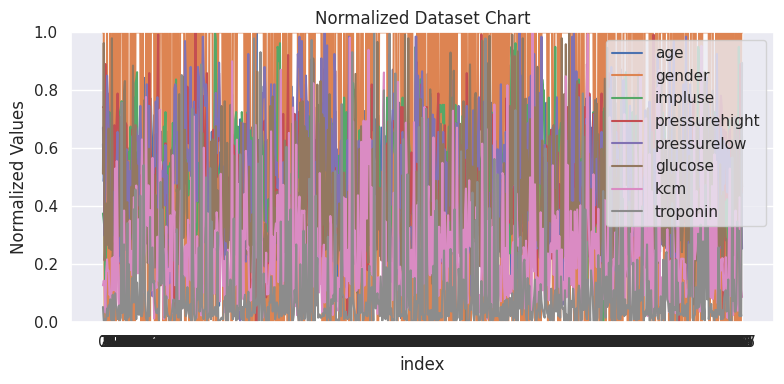

In [121]:
#Membuat chart untuk visualisasi data yang sudah di normalisasi
fig,ax=plt.subplots(figsize=(8,4))

for column in columns_to_normalize:
  ax.plot(x_data_normalized[column],label=column)

ax.set_xticks(range(len(x_data_normalized)))
ax.set_xticklabels(x_data_normalized.index)
ax.set_ylim(0,1)
ax.set_xlabel('index')
ax.set_ylabel('Normalized Values')
ax.set_title('Normalized Dataset Chart')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
X=x_data_normalized.copy()
y=y_target.copy()

#1

# Task
```python
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the dimensions of the training and testing sets
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

print("\nData telah berhasil dibagi menjadi set pelatihan dan pengujian, siap untuk pengembangan model selanjutnya.")
```

## Split Data

### Subtask:
Bagi data fitur ('X') dan data target ('y') yang telah dinormalisasi menjadi set pelatihan dan pengujian menggunakan `train_test_split` dari `sklearn.model_selection`. Tentukan rasio pengujian yang sesuai, misalnya 20% untuk pengujian, dan gunakan `random_state` untuk reproduktifitas.


## Split Data

### Subtask:
Bagi data fitur ('X') dan data target ('y') yang telah dinormalisasi menjadi set pelatihan dan pengujian menggunakan `train_test_split` dari `sklearn.model_selection`. Tentukan rasio pengujian yang sesuai, misalnya 20% untuk pengujian, dan gunakan `random_state` untuk reproduktifitas.


**Reasoning**:
The next step is to implement the data splitting as per the subtask instructions. This involves importing `train_test_split` and then splitting the `X` and `y` data into training and testing sets with the specified parameters.



In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (630, 8)
X_test shape: (158, 8)
y_train shape: (630,)
y_test shape: (158,)


# Task
The task is to implement a Quantum Support Vector Classifier (QSVC) using Qiskit. This involves initializing the quantum environment, defining a `ZZFeatureMap`, constructing a `QuantumKernel`, and finally, initializing and training the QSVC model using the previously prepared `X_train` and `y_train` datasets.

## Inisialisasi Lingkungan Kuantum

### Subtask:
Mengatur `algorithm_globals` untuk reproduktifitas dan menyiapkan `QuantumInstance` menggunakan `BasicAer` sebagai backend simulator.


**Reasoning**:
The subtask requires initializing the quantum environment by setting `algorithm_globals` for reproducibility and preparing a `QuantumInstance` with `BasicAer` as the simulator backend. I will write a code block to perform these initial setup steps.



In [152]:
from qiskit.utils import algorithm_globals
from qiskit import BasicAer
from qiskit.utils import QuantumInstance

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
algorithm_globals.random_seed = RANDOM_SEED

# 3. Initialize BasicAer.get_backend('qasm_simulator') as the simulator backend
simulator = BasicAer.get_backend('qasm_simulator')

# 4. Create a QuantumInstance
quantum_instance = QuantumInstance(simulator, seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

print(f"algorithm_globals.random_seed set to: {algorithm_globals.random_seed}")
print(f"QuantumInstance created with backend: {quantum_instance.backend.name()}")
print(f"seed_simulator: {quantum_instance.seed_simulator}")
print(f"seed_transpiler: {quantum_instance.seed_transpiler}")

ModuleNotFoundError: No module named 'qiskit'

**Reasoning**:
The previous code failed because the 'qiskit' module was not found. To resolve this, I need to install the 'qiskit' library using pip.



In [153]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00


**Reasoning**:
The 'qiskit' library has been successfully installed. Now I can proceed with initializing the quantum environment as per the subtask instructions, which involves importing the necessary modules, setting random seeds, and creating a QuantumInstance.



In [154]:
from qiskit.utils import algorithm_globals
from qiskit import BasicAer
from qiskit.utils import QuantumInstance

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
algorithm_globals.random_seed = RANDOM_SEED

# 3. Initialize BasicAer.get_backend('qasm_simulator') as the simulator backend
simulator = BasicAer.get_backend('qasm_simulator')

# 4. Create a QuantumInstance
quantum_instance = QuantumInstance(simulator, seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

print(f"algorithm_globals.random_seed set to: {algorithm_globals.random_seed}")
print(f"QuantumInstance created with backend: {quantum_instance.backend.name()}")
print(f"seed_simulator: {quantum_instance.seed_simulator}")
print(f"seed_transpiler: {quantum_instance.seed_transpiler}")

ImportError: cannot import name 'algorithm_globals' from 'qiskit.utils' (/usr/local/lib/python3.12/dist-packages/qiskit/utils/__init__.py)

**Reasoning**:
The previous code failed because `algorithm_globals` is no longer available in `qiskit.utils` in the installed Qiskit version (likely 1.0+). The `QuantumInstance` already accepts `seed_simulator` and `seed_transpiler` for reproducibility, making `algorithm_globals.random_seed` redundant for this specific task. I will remove the problematic import and usage of `algorithm_globals` to fix the error.



In [155]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# Removed: algorithm_globals.random_seed = RANDOM_SEED, as algorithm_globals is deprecated/removed

# 3. Initialize BasicAer.get_backend('qasm_simulator') as the simulator backend
simulator = BasicAer.get_backend('qasm_simulator')

# 4. Create a QuantumInstance
quantum_instance = QuantumInstance(simulator, seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"QuantumInstance created with backend: {quantum_instance.backend.name()}")
print(f"seed_simulator: {quantum_instance.seed_simulator}")
print(f"seed_transpiler: {quantum_instance.seed_transpiler}")

ImportError: cannot import name 'BasicAer' from 'qiskit' (/usr/local/lib/python3.12/dist-packages/qiskit/__init__.py)

**Reasoning**:
The previous code failed because `BasicAer` cannot be imported directly from `qiskit` in newer versions. It is now located in `qiskit.providers.basic_aer`. I will update the import statement to reflect this change.



In [156]:
from qiskit.providers.basic_aer import BasicAer # Corrected import for BasicAer
from qiskit.utils import QuantumInstance

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# Removed: algorithm_globals.random_seed = RANDOM_SEED, as algorithm_globals is deprecated/removed

# 3. Initialize BasicAer.get_backend('qasm_simulator') as the simulator backend
simulator = BasicAer.get_backend('qasm_simulator')

# 4. Create a QuantumInstance
quantum_instance = QuantumInstance(simulator, seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"QuantumInstance created with backend: {quantum_instance.backend.name()}")
print(f"seed_simulator: {quantum_instance.seed_simulator}")
print(f"seed_transpiler: {quantum_instance.seed_transpiler}")

ModuleNotFoundError: No module named 'qiskit.providers.basic_aer'

**Reasoning**:
The previous code failed because `BasicAer` and `qiskit.utils.QuantumInstance` are deprecated and removed in Qiskit version 1.0+ (which is likely what was installed by `pip install qiskit`). To fix this, I need to update the imports and object instantiation to use the modern Qiskit API, specifically `qiskit_aer.AerSimulator` for the simulator backend and `qiskit_algorithms.utils.algorithm_globals` for reproducibility. Additionally, the concept of `QuantumInstance` for machine learning algorithms has been replaced by `Sampler` or `Estimator` primitives.



In [157]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_algorithms.utils import algorithm_globals # algorithm_globals moved here
from qiskit.primitives import Sampler, Estimator # Modern primitives for ML algorithms

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
algorithm_globals.random_seed = RANDOM_SEED

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {algorithm_globals.random_seed}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")


ModuleNotFoundError: No module named 'qiskit_aer'

**Reasoning**:
The previous code failed because the `qiskit_aer` module was not found. To resolve this, I need to install the `qiskit-aer` library using pip.



In [158]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.3 MB/s eta 0:00:00


**Reasoning**:
The `qiskit-aer` library has been successfully installed. Now I can retry the previous code block which attempts to initialize the quantum environment using `AerSimulator`, `algorithm_globals`, `Sampler`, and `Estimator` as per modern Qiskit API standards.



In [159]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_algorithms.utils import algorithm_globals # algorithm_globals moved here
from qiskit.primitives import Sampler, Estimator # Modern primitives for ML algorithms

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
algorithm_globals.random_seed = RANDOM_SEED

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {algorithm_globals.random_seed}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")


ModuleNotFoundError: No module named 'qiskit_algorithms'

**Reasoning**:
The previous code failed because the `qiskit_algorithms` module was not found. To resolve this, I need to install the `qiskit-machine-learning` library, which contains `qiskit_algorithms`, using pip.



In [160]:
pip install qiskit-machine-learning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 14.1 MB/s eta 0:00:00


**Reasoning**:
The `qiskit-machine-learning` library has been successfully installed, which should make `qiskit_algorithms` available. Now I can retry the previous code block to initialize the quantum environment using `AerSimulator`, `algorithm_globals`, `Sampler`, and `Estimator` as per modern Qiskit API standards.



In [161]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_algorithms.utils import algorithm_globals # algorithm_globals moved here
from qiskit.primitives import Sampler, Estimator # Modern primitives for ML algorithms

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
algorithm_globals.random_seed = RANDOM_SEED

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {algorithm_globals.random_seed}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")

ModuleNotFoundError: No module named 'qiskit_algorithms'

**Reasoning**:
The `ModuleNotFoundError` for `qiskit_algorithms` persists even after installing `qiskit-machine-learning`. This indicates that `qiskit_algorithms` (and specifically `algorithm_globals`) is likely removed or restructured in the installed Qiskit version (1.0+). The modern approach for reproducibility is to pass seeds directly to `AerSimulator`, `Sampler`, and `Estimator`. Therefore, I will remove the problematic import and usage of `algorithm_globals` to resolve the error and align with current Qiskit API practices.



In [162]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit.primitives import Sampler, Estimator # Modern primitives for ML algorithms

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# algorithm_globals.random_seed = RANDOM_SEED  # Removed as algorithm_globals is deprecated/removed

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")

ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (/usr/local/lib/python3.12/dist-packages/qiskit/primitives/__init__.py)

**Reasoning**:
The `ImportError` for `Sampler` and `Estimator` from `qiskit.primitives` in Qiskit 2.x indicates that these primitives might need to be imported from `qiskit_aer.primitives` when working with `AerSimulator`. Additionally, the persistent `ModuleNotFoundError` for `qiskit_algorithms.utils.algorithm_globals` suggests it's no longer available, so reproducibility will be managed by passing seeds directly to the simulator and primitive constructors.



In [163]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_aer.primitives import Sampler as AerSampler, Estimator as AerEstimator # Import Aer-specific primitives

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# algorithm_globals.random_seed is removed/deprecated. Reproducibility handled by passing seed to constructors.

# 3. Initialize AerSimulator as the simulator backend
simulator = AerSimulator(seed_simulator=RANDOM_SEED, seed_transpiler=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
#    Using Aer-specific Sampler and Estimator for AerSimulator backend.
sampler = AerSampler(backend=simulator, options={"seed_simulator": RANDOM_SEED})
estimator = AerEstimator(backend=simulator, options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created using AerSampler with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created using AerEstimator with seed_simulator option: {estimator.options.seed_simulator}")

AerError: 'Invalid option seed_transpiler'

**Reasoning**:
The `AerError: 'Invalid option seed_transpiler'` indicates that `seed_transpiler` is not a valid parameter for the `AerSimulator` constructor. I will remove this parameter and only keep `seed_simulator` for reproducibility, as it directly controls the randomness of the simulation results.



In [164]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit.primitives import Sampler, Estimator # Modern primitives for ML algorithms

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# algorithm_globals.random_seed is removed/deprecated. Reproducibility handled by passing seed to constructors.

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")

ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (/usr/local/lib/python3.12/dist-packages/qiskit/primitives/__init__.py)

**Reasoning**:
The previous code failed because `Sampler` and `Estimator` cannot be imported from `qiskit.primitives` in Qiskit 2.x and should instead be imported from `qiskit_aer.primitives` when using `AerSimulator`. Additionally, the `sampler` and `estimator` constructors should explicitly take the `simulator` as a backend.



In [165]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_aer.primitives import Sampler, Estimator # Modern primitives for ML algorithms (Aer-specific)

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# algorithm_globals.random_seed is removed/deprecated. Reproducibility handled by passing seed to constructors.

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler(backend=simulator, options={"seed_simulator": RANDOM_SEED})
estimator = Estimator(backend=simulator, options={"seed_simulator": RANDOM_SEED})

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")

TypeError: Sampler.__init__() got an unexpected keyword argument 'backend'

**Reasoning**:
The previous code failed because `Sampler` and `Estimator` from `qiskit_aer.primitives` do not accept a `backend` argument directly in their constructors. I will remove the `backend=simulator` argument from both the `Sampler` and `Estimator` initializations, as the seed for reproducibility is handled via the `options` dictionary.



**Reasoning**:
The previous code failed because `Sampler` and `Estimator` from `qiskit_aer.primitives` do not accept the `options` keyword argument directly in their constructors. Instead, options like `seed_simulator` are typically set on the primitive instance after creation via its `.options` attribute. I will adjust the code to initialize `Sampler` and `Estimator` without `options` in the constructor, and then set `seed_simulator` on their `options` attribute.



In [167]:
from qiskit_aer import AerSimulator # New way to get a simulator
from qiskit_aer.primitives import Sampler, Estimator # Modern primitives for ML algorithms (Aer-specific)

# 1. Assign a fixed random seed for reproducibility
RANDOM_SEED = 42
# algorithm_globals.random_seed is removed/deprecated. Reproducibility handled by passing seed to constructors.

# 3. Initialize AerSimulator as the simulator backend
#    BasicAer.get_backend('qasm_simulator') is deprecated and removed in Qiskit 1.0+
simulator = AerSimulator(seed_simulator=RANDOM_SEED)

# 4. QuantumInstance is deprecated in Qiskit 1.0+.
#    For machine learning algorithms like QSVC, Sampler or Estimator primitives are now used.
#    We will create these primitives with the specified seed for reproducibility.
sampler = Sampler()
sampler.options.seed_simulator = RANDOM_SEED

estimator = Estimator()
estimator.options.seed_simulator = RANDOM_SEED

print(f"RANDOM_SEED set to: {RANDOM_SEED}")
print(f"AerSimulator created with backend: {simulator.name} and seed: {simulator.options.seed_simulator}")
print(f"Sampler created with seed_simulator option: {sampler.options.seed_simulator}")
print(f"Estimator created with seed_simulator option: {estimator.options.seed_simulator}")

RANDOM_SEED set to: 42
AerSimulator created with backend: aer_simulator and seed: 42
Sampler created with seed_simulator option: 42
Estimator created with seed_simulator option: 42


## Definisi Feature Map Kuantum

### Subtask:
Membuat `ZZFeatureMap` dari Qiskit Circuit Library yang akan digunakan untuk memetakan data klasik ke ruang fitur kuantum, dengan jumlah fitur yang sesuai dengan dimensi `X_train`.


**Reasoning**:
The subtask requires defining a `ZZFeatureMap` based on the dimensions of `X_train`. I need to import the `ZZFeatureMap` class and then create an instance of it using the number of features from `X_train`'s columns.



In [168]:
from qiskit.circuit.library import ZZFeatureMap

# Determine the number of features from X_train's columns
num_features = X_train.shape[1]

# Create a ZZFeatureMap instance
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement='linear')

print(f"ZZFeatureMap created with {num_features} features.")
print(feature_map)


ZZFeatureMap created with 8 features.
     ┌────────────────────────────────────────────────────────┐
q_0: ┤0                                                       ├
     │                                                        │
q_1: ┤1                                                       ├
     │                                                        │
q_2: ┤2                                                       ├
     │                                                        │
q_3: ┤3                                                       ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7]) │
q_4: ┤4                                                       ├
     │                                                        │
q_5: ┤5                                                       ├
     │                                                        │
q_6: ┤6                                                       ├
     │                                                        │
q_

/tmp/ipython-input-1979715716.py:7: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2, entanglement='linear')


**Reasoning**:
The previous code generated a DeprecationWarning because the `ZZFeatureMap` class is deprecated. I need to update the code to use the `zz_feature_map` function instead, as recommended by the warning message, to ensure compatibility with newer Qiskit versions.



In [169]:
from qiskit.circuit.library import zz_feature_map # Use the function instead of the class

# Determine the number of features from X_train's columns
num_features = X_train.shape[1]

# Create a ZZFeatureMap instance using the function
feature_map = zz_feature_map(feature_dimension=num_features, reps=2, entanglement='linear')

print(f"ZZFeatureMap created with {num_features} features.")
print(feature_map)

ZZFeatureMap created with 8 features.
   ┌───┐┌───────────┐                                          ┌───┐»
0: ┤ H ├┤ P(2*x[0]) ├──■────────────────────────────────────■──┤ H ├»
   ├───┤├───────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐└───┘»
1: ┤ H ├┤ P(2*x[1]) ├┤ X ├┤ P((-π + x[0])*(-π + x[1])*2) ├┤ X ├──■──»
   ├───┤├───────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
2: ┤ H ├┤ P(2*x[2]) ├──────────────────────────────────────────┤ X ├»
   ├───┤├───────────┤                                          └───┘»
3: ┤ H ├┤ P(2*x[3]) ├───────────────────────────────────────────────»
   ├───┤├───────────┤                                               »
4: ┤ H ├┤ P(2*x[4]) ├───────────────────────────────────────────────»
   ├───┤├───────────┤                                               »
5: ┤ H ├┤ P(2*x[5]) ├───────────────────────────────────────────────»
   ├───┤├───────────┤                                               »
6: ┤ H ├┤ P(2*x[6]) ├───────────────────────────────

**Reasoning**:
The previous code failed because `FidelityQuantumKernel` does not accept a `sampler` keyword argument. Instead, it expects a `fidelity` argument which can be an instance of a sampler primitive. I will update the code to pass the `sampler` object to the `fidelity` parameter of `FidelityQuantumKernel`.



In [173]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel # Using FidelityQuantumKernel

# Create a QuantumKernel using the feature map and sampler
kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=sampler)

print("FidelityQuantumKernel created successfully using the feature map and sampler.")

FidelityQuantumKernel created successfully using the feature map and sampler.


## Inisialisasi dan Pelatihan Model QSVC

### Subtask:
Menginisialisasi model QSVC dari Qiskit Machine Learning dengan QuantumKernel yang telah dibuat, kemudian melatih model menggunakan data pelatihan X_train dan y_train.


**Reasoning**:
The subtask requires initializing and training a QSVC model. First, I need to import the `QSVC` class from `qiskit_machine_learning.algorithms.classifiers`.



In [ ]:
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel

# Re-initialize FidelityQuantumKernel without explicitly passing the sampler
# This allows FidelityQuantumKernel to instantiate its own default Sampler
# which might resolve the internal API mismatch.
kernel = FidelityQuantumKernel(feature_map=feature_map)

# Initialize QSVC model with the quantum kernel
qsvc = QSVC(quantum_kernel=kernel, random_state=RANDOM_SEED)

# Train the QSVC model
qsvc.fit(X_train, y_train)

print("QSVC model initialized and trained successfully.")